In [36]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported.')


Libraries imported.


In [37]:
#!pwd to check the working directory
raw_df = pd.read_csv('data/NYC_May18May19.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 644496 Airbnb listings


,Unnamed: 0,date,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,0,5/9/18,2515,2758,Harlem,40.799205,-73.953676,Private room,59,2,3
1,1,5/9/18,2539,2787,Kensington,40.647486,-73.972370,Hotel,79,1,7
2,2,5/9/18,2595,2845,Midtown,40.753621,-73.983774,Entire home/apt,225,1,2


In [38]:
raw_df.dtypes

Unnamed: 0                          int64
date                               object
id                                  int64
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
calculated_host_listings_count      int64
dtype: object

In [45]:
raw_df.date = pd.to_datetime(raw_df.date) 
raw_df=raw_df.dropna()
raw_df.head()

,Unnamed: 0,date,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,0,2018-05-09,2515,2758,Harlem,40.799205,-73.953676,Private room,59,2,3
1,1,2018-05-09,2539,2787,Kensington,40.647486,-73.972370,Hotel,79,1,7
2,2,2018-05-09,2595,2845,Midtown,40.753621,-73.983774,Entire home/apt,225,1,2
3,3,2018-05-09,3330,4177,Williamsburg,40.708558,-73.942362,Private room,70,5,3
4,4,2018-05-09,3647,4632,Harlem,40.809018,-73.941902,Private room,150,3,1


In [46]:
cols_to_drop = ['Unnamed: 0']
df = raw_df.drop(cols_to_drop, axis=1)
df

,date,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,2018-05-09,2515,2758,Harlem,40.799205,-73.953676,Private room,59,2,3
1,2018-05-09,2539,2787,Kensington,40.647486,-73.972370,Hotel,79,1,7
2,2018-05-09,2595,2845,Midtown,40.753621,-73.983774,Entire home/apt,225,1,2
3,2018-05-09,3330,4177,Williamsburg,40.708558,-73.942362,Private room,70,5,3
4,2018-05-09,3647,4632,Harlem,40.809018,-73.941902,Private room,150,3,1
...,...,...,...,...,...,...,...,...,...,...
644491,2019-05-03,35291681,29731292,Elmhurst,40.744840,-73.876960,Private room,60,2,1
644492,2019-05-03,35292625,137191484,Hell's Kitchen,40.764410,-73.986450,Private room,86,1,6
644493,2019-05-03,35297530,261852064,Upper East Side,40.772330,-73.953210,Entire home/apt,160,30,1
644494,2019-05-03,35301609,158200817,Prospect-Lefferts Gardens,40.657330,-73.958810,Private room,89,1,2


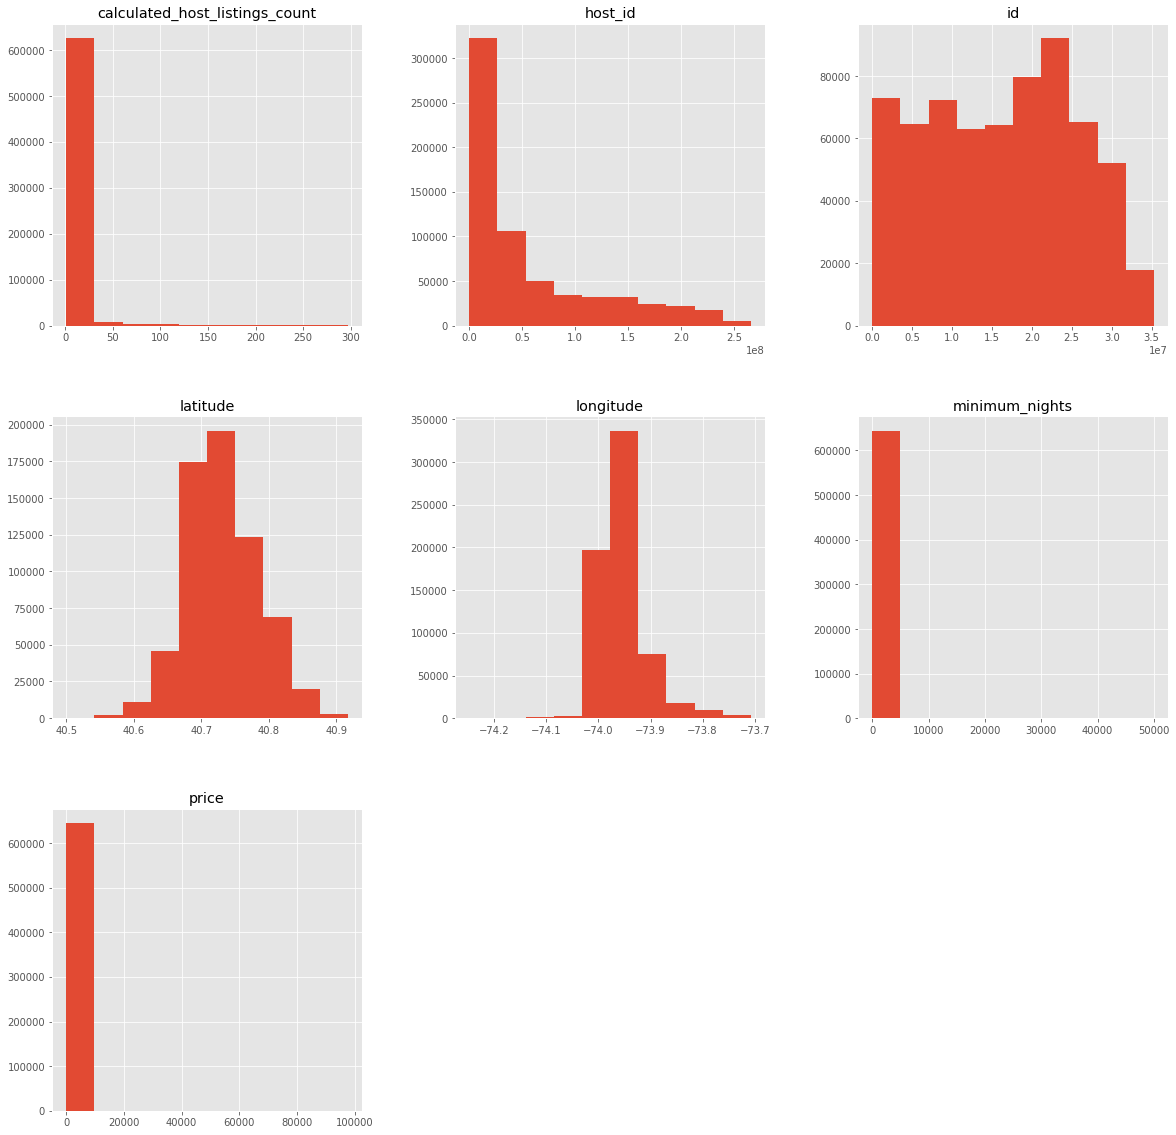

In [47]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [48]:
df.room_type.value_counts()

Entire home/apt    335277
Private room       294526
Shared room         14692
Hotel                   1
Name: room_type, dtype: int64

In [49]:
df.isna().sum()

date                              0
id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
calculated_host_listings_count    0
dtype: int64

In [53]:
df.head()
df.dtypes

date                              datetime64[ns]
id                                         int64
host_id                                    int64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
calculated_host_listings_count             int64
dtype: object

In [54]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_price=lstm_model.predict(X_test)
predicted_price=scaler.inverse_transform(predicted_price)

In [ ]:
lstm_model.save("saved_model.h5")

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_price
plt.plot(train_data["price"])
plt.plot(valid_data[['price',"Predictions"]])